In [ ]:
import nltk

In [ ]:
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

Outlook mapping: {'O': 0, 'R': 1, 'S': 2}
Wind mapping: {'F': 0, 'T': 1}
Temperature mapping: {'C': 0, 'H': 1, 'M': 2}
[0]
[0]
Accuracy: 0.3333333333333333
Precision: [0.5 0. ]
Recall: [0.5 0. ]
Species mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
[0]
Accuracy: 0.8695652173913043
Precision: [1.  1.  0.7]
Recall: [1.  0.7 1. ]
Accuracy: 0.9370629370629371
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 

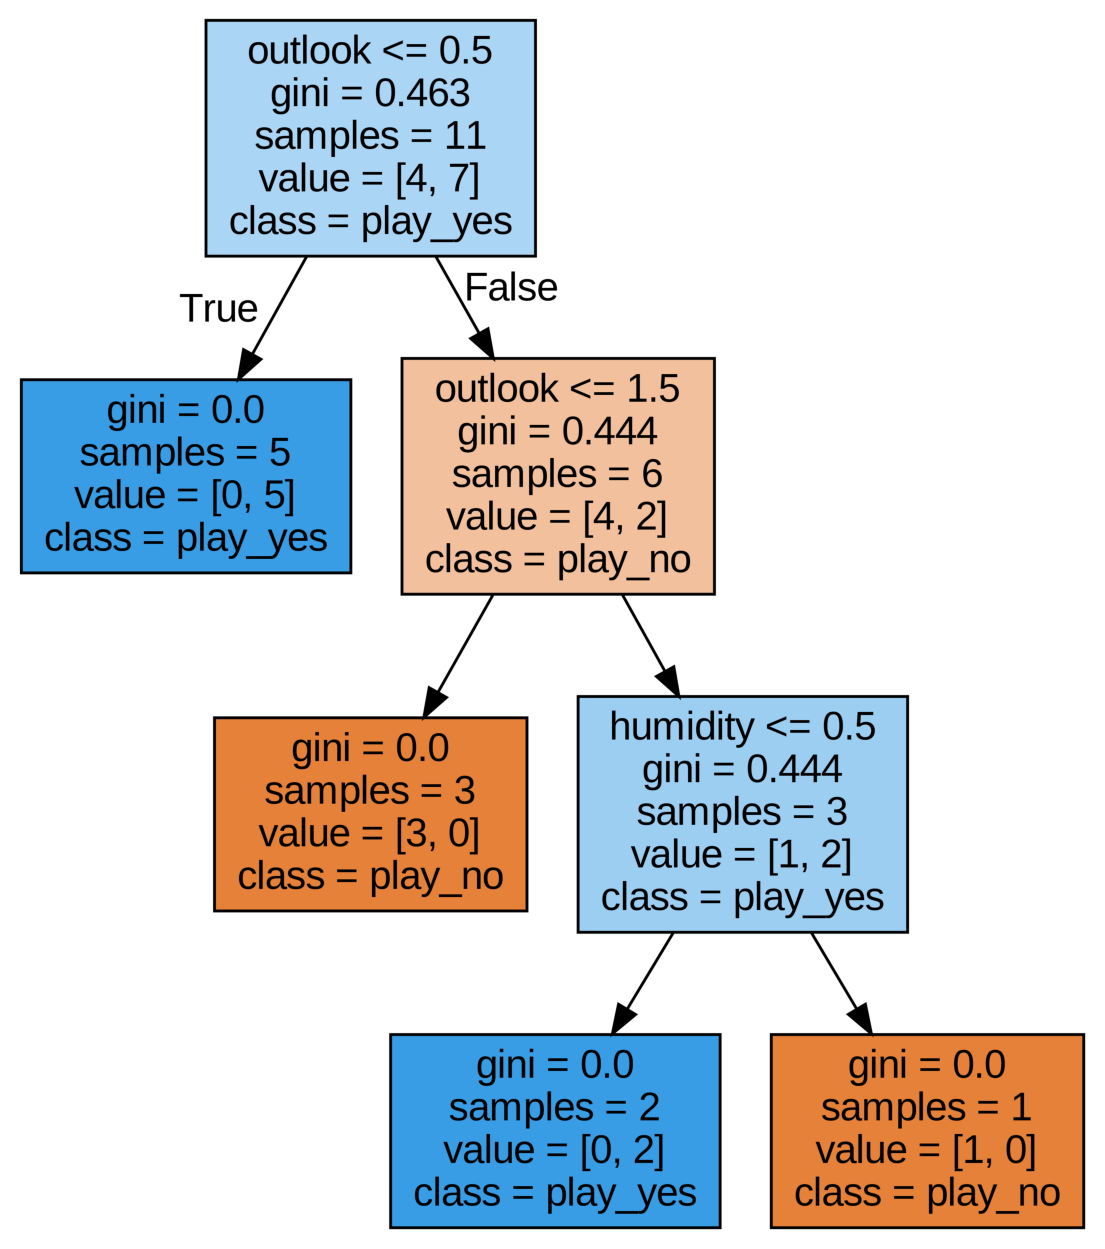

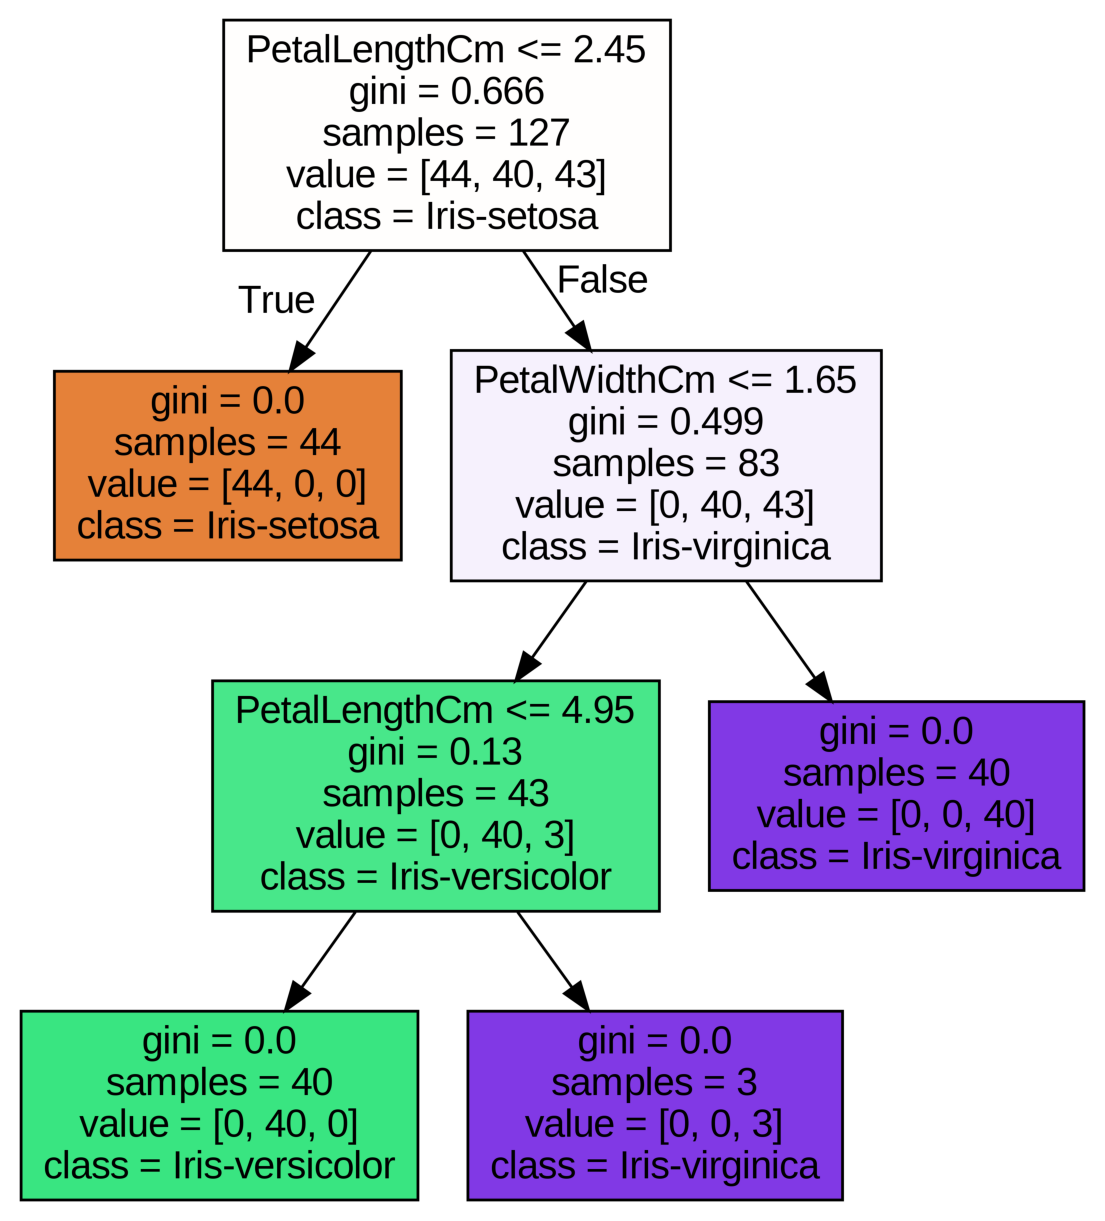

In [5]:

# For Outlook Data Set

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt

# Load Outlook Data Set
le = preprocessing.LabelEncoder()
data = pd.read_csv("/Dataset3.csv")
df = pd.DataFrame(data)

# Encoding categorical variables
outlook_encoded = le.fit_transform(df["Outlook"])
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outlook mapping:", Outlook_name_mapping)
wind_encoded = le.fit_transform(df["Wind"])
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:", Wind_name_mapping)
temp_encoded = le.fit_transform(df["Temp"])
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:", Temperature_name_mapping)

# Combine features
features = tuple(zip(outlook_encoded, temp_encoded, wind_encoded, df["Humidity"]))

# Splitting training and testing data
data_train, data_test, target_train, target_test = train_test_split(features, df["Class"], test_size=0.15, random_state=118)

# Train the Model
model = DecisionTreeClassifier(random_state=124, max_leaf_nodes=21)
model.fit(data_train, target_train)

# Predictions
predicted = model.predict([[1, 2, 0, 1]])  # Rainy, Mild, False, Normal
print(predicted)
predicted = model.predict([[2, 0, 1, 2]])  # Sunny, Cool, True, Strong
print(predicted)

# Display the Decision Tree
export_graphviz(model, out_file='tree_entropy.dot',
                feature_names=['outlook', 'temperature', 'humidity', 'wind'],
                class_names=['play_no', 'play_yes'], filled=True)

call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

plt.figure(figsize=(14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off')

# Recall And Precision
target_pred = model.predict(data_test)
print("Accuracy:", metrics.accuracy_score(target_test, target_pred))
precision = precision_score(target_test, target_pred, average=None)
recall = recall_score(target_test, target_pred, average=None)
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))

# For Iris Data set

# Load Iris Data Set
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")
df = pd.DataFrame(data)

# Encoding categorical variable
species_encoded = le.fit_transform(df["Species"])
species_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Species mapping:", species_name_mapping)

# Combine features
features = tuple(zip(df["SepalLengthCm"], df["SepalWidthCm"], df["PetalLengthCm"], df["PetalWidthCm"]))

# Splitting training and testing data
data_train, data_test, target_train, target_test = train_test_split(features, species_encoded, test_size=0.15, random_state=124)

# Train the Model
model = DecisionTreeClassifier(random_state=124, max_leaf_nodes=21)
model.fit(data_train, target_train)

# Predictions
predicted = model.predict([[5.1, 3.5, 1.4, 0.2]])
print(predicted)

# Display the Decision Tree
export_graphviz(model, out_file='tree_iris.dot',
                feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], filled=True)

call(['dot', '-Tpng', 'tree_iris.dot', '-o', 'tree_iris.png', '-Gdpi=600'])

plt.figure(figsize=(14, 18))
plt.imshow(plt.imread('tree_iris.png'))
plt.axis('off')

# Precision And Recall
target_pred = model.predict(data_test)
print("Accuracy:", metrics.accuracy_score(target_test, target_pred))
precision = precision_score(target_test, target_pred, average=None)
recall = recall_score(target_test, target_pred, average=None)
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))

# For Breast Cancer Dataset

from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=124)

clf = DecisionTreeClassifier(random_state=124)
clf.fit(X_train, y_train)

target_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, target_pred))
print(X, y)
